## Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the data

In [2]:
data = pd.read_csv('data/laptop_price_dataset.csv')
data

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [3]:
data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [4]:
# Checking for null values
data.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

There are no null values, but i have to check for anomalies in the dataset

In [5]:
# Checking how many categories exist in each of the following categories
print(f"List of CPU Companies: {data['CPU_Company'].unique()}")
print(f"List of GPU Companies: {data['GPU_Company'].unique()}")
print(f"List of Operating Systems: {data['OpSys'].unique()}")

List of CPU Companies: ['Intel' 'AMD' 'Samsung']
List of GPU Companies: ['Intel' 'AMD' 'Nvidia' 'ARM']
List of Operating Systems: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [6]:
# Renaming the columns names
new_data = data.rename(columns={"CPU_Frequency (GHz)": "CPU_Frequency", "RAM (GB)": "RAM:", "Weight (kg)": "Weight", "Price (Euro)": "Price"})
print(new_data.columns.tolist())

['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'CPU_Frequency', 'RAM:', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys', 'Weight', 'Price']


## EDA

In [40]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-v0_8-whitegrid')

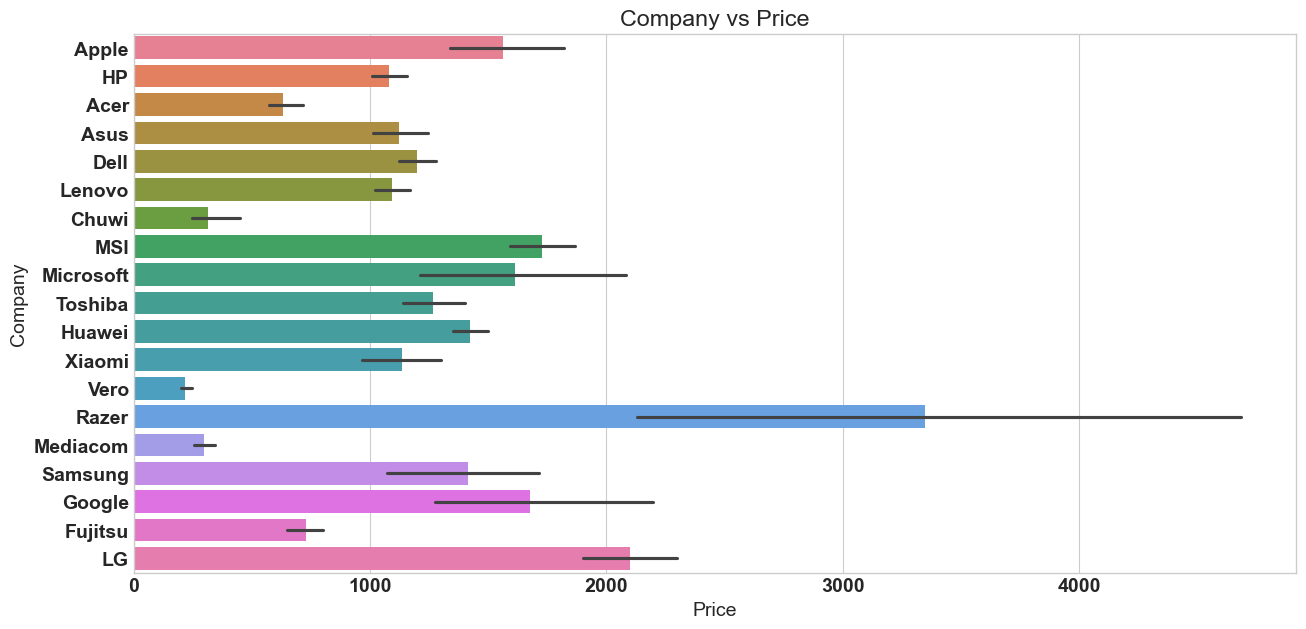

In [41]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Price", y="Company", data=new_data, hue="Company")
plt.title('Company vs Price')
plt.savefig('graphimages/cp.png')

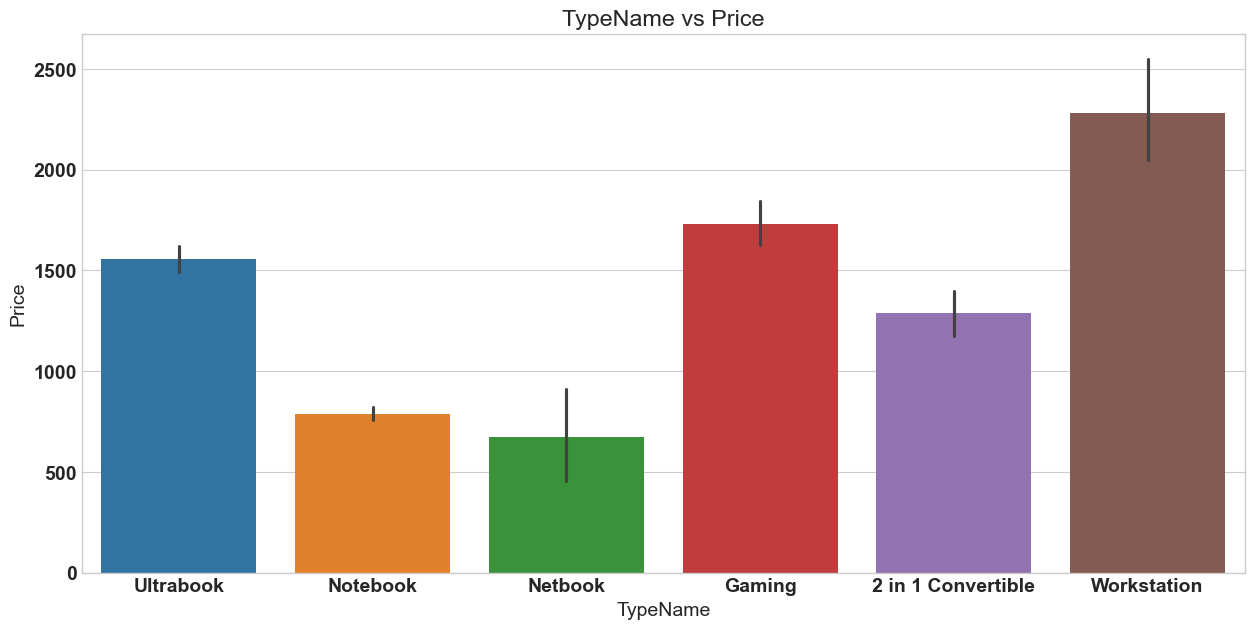

In [42]:
plt.figure(figsize=(15, 7))
sns.barplot(x="TypeName", y="Price", data=new_data, hue="TypeName")
plt.title('TypeName vs Price')
plt.savefig('graphimages/TyP.png')

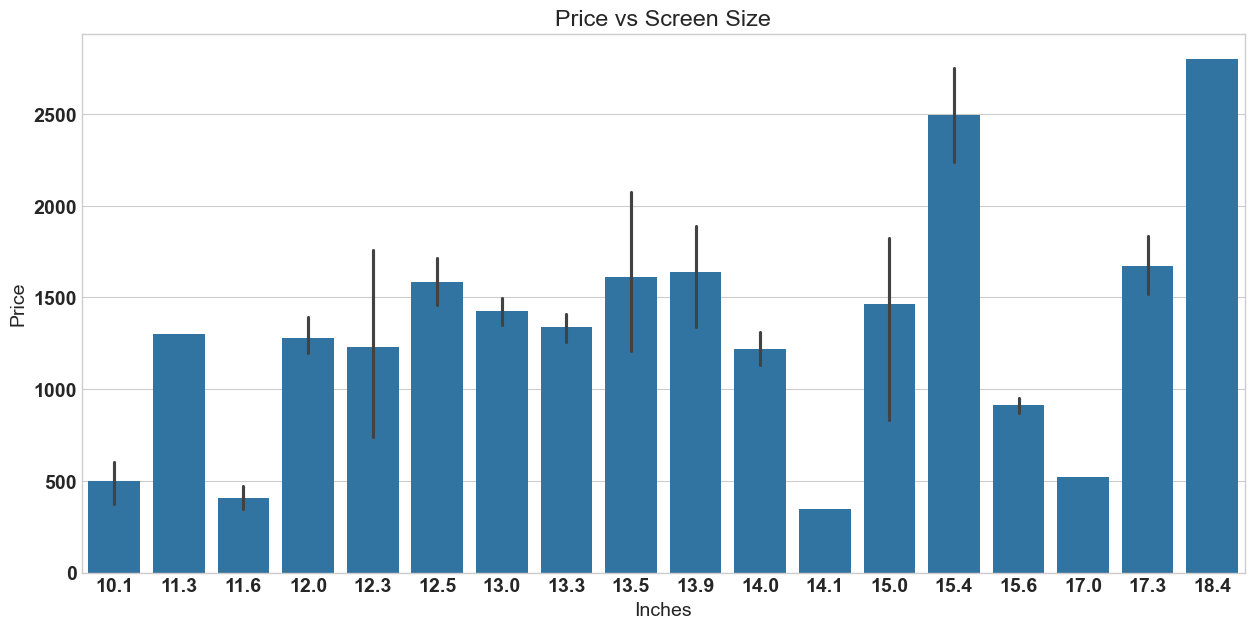

In [82]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Inches", y="Price", data=new_data)
plt.title('Price vs Screen Size')
plt.savefig('graphimages/InP.png')

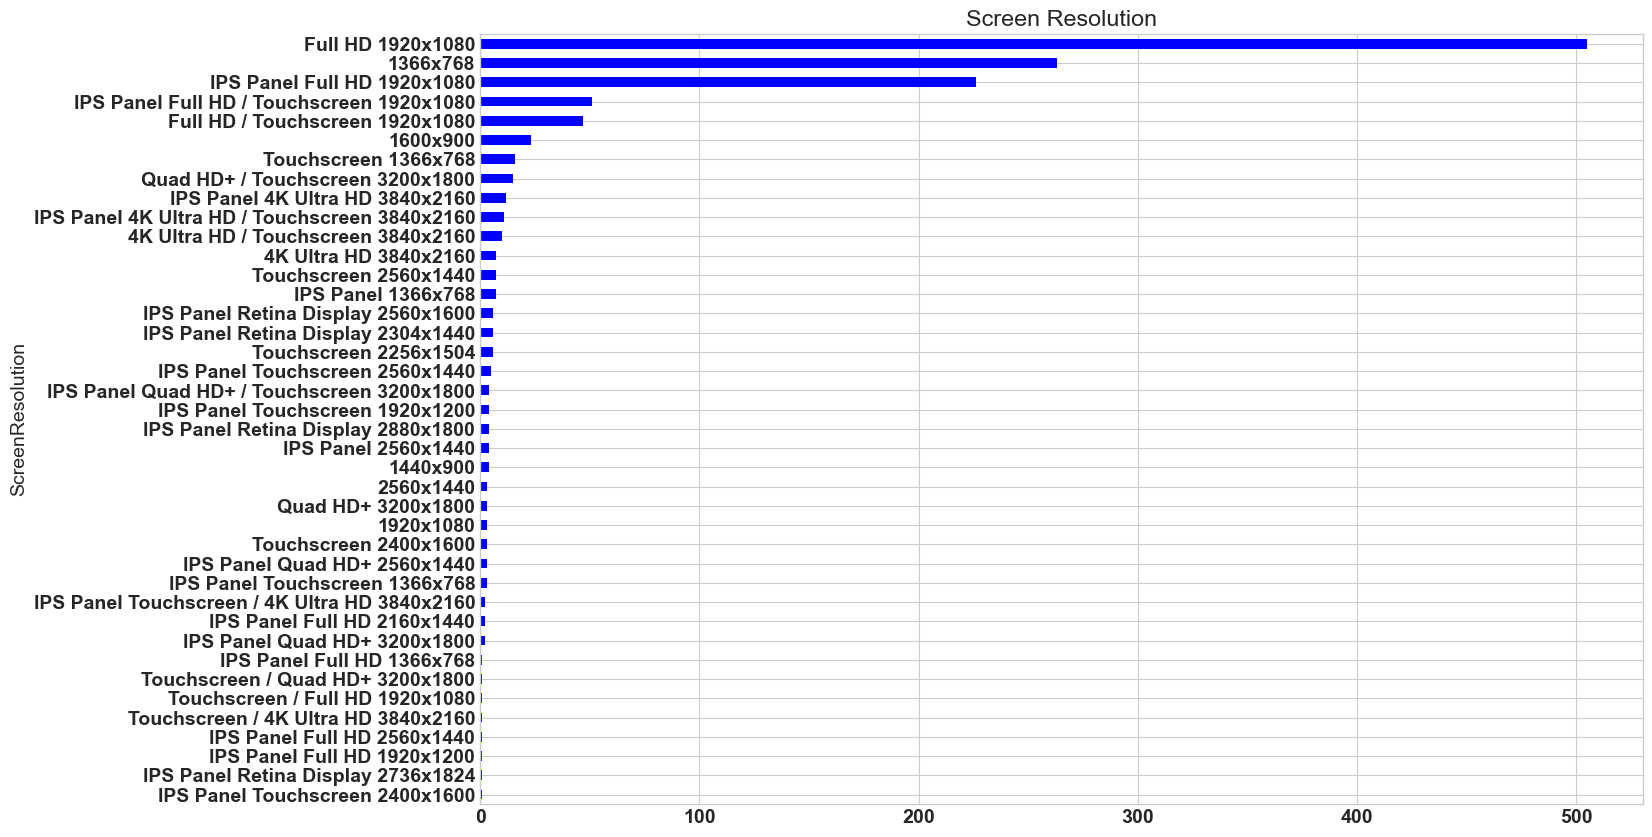

In [92]:
sr = data['ScreenResolution'].value_counts()
sr = sr.sort_values(ascending=True)
plt.figure(figsize=(15, 10))
sr.plot(kind='barh', color='b', title='Screen Resolution')

plt.savefig('graphimages/resolution.png')

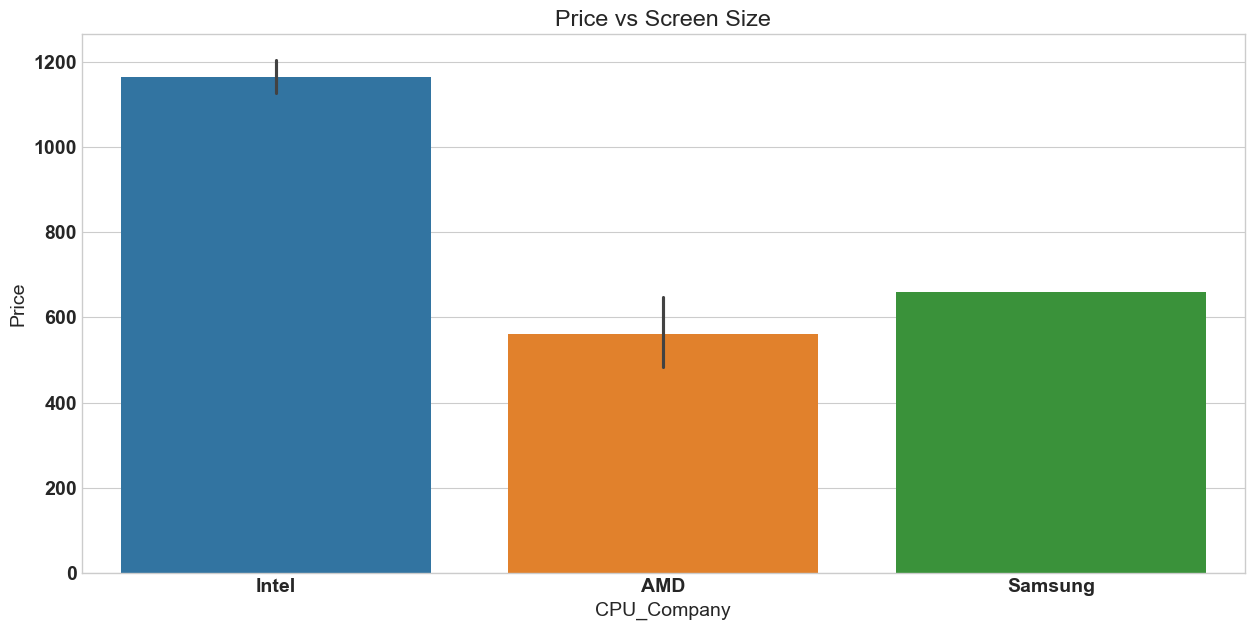

In [57]:
plt.figure(figsize=(15, 7))
sns.barplot(x='CPU_Company', y="Price", data=new_data, hue='CPU_Company')
plt.title('Price vs Screen Size')
plt.savefig('graphimages/cpu.png')

In [59]:
data['CPU_Type'].value_counts()

CPU_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64

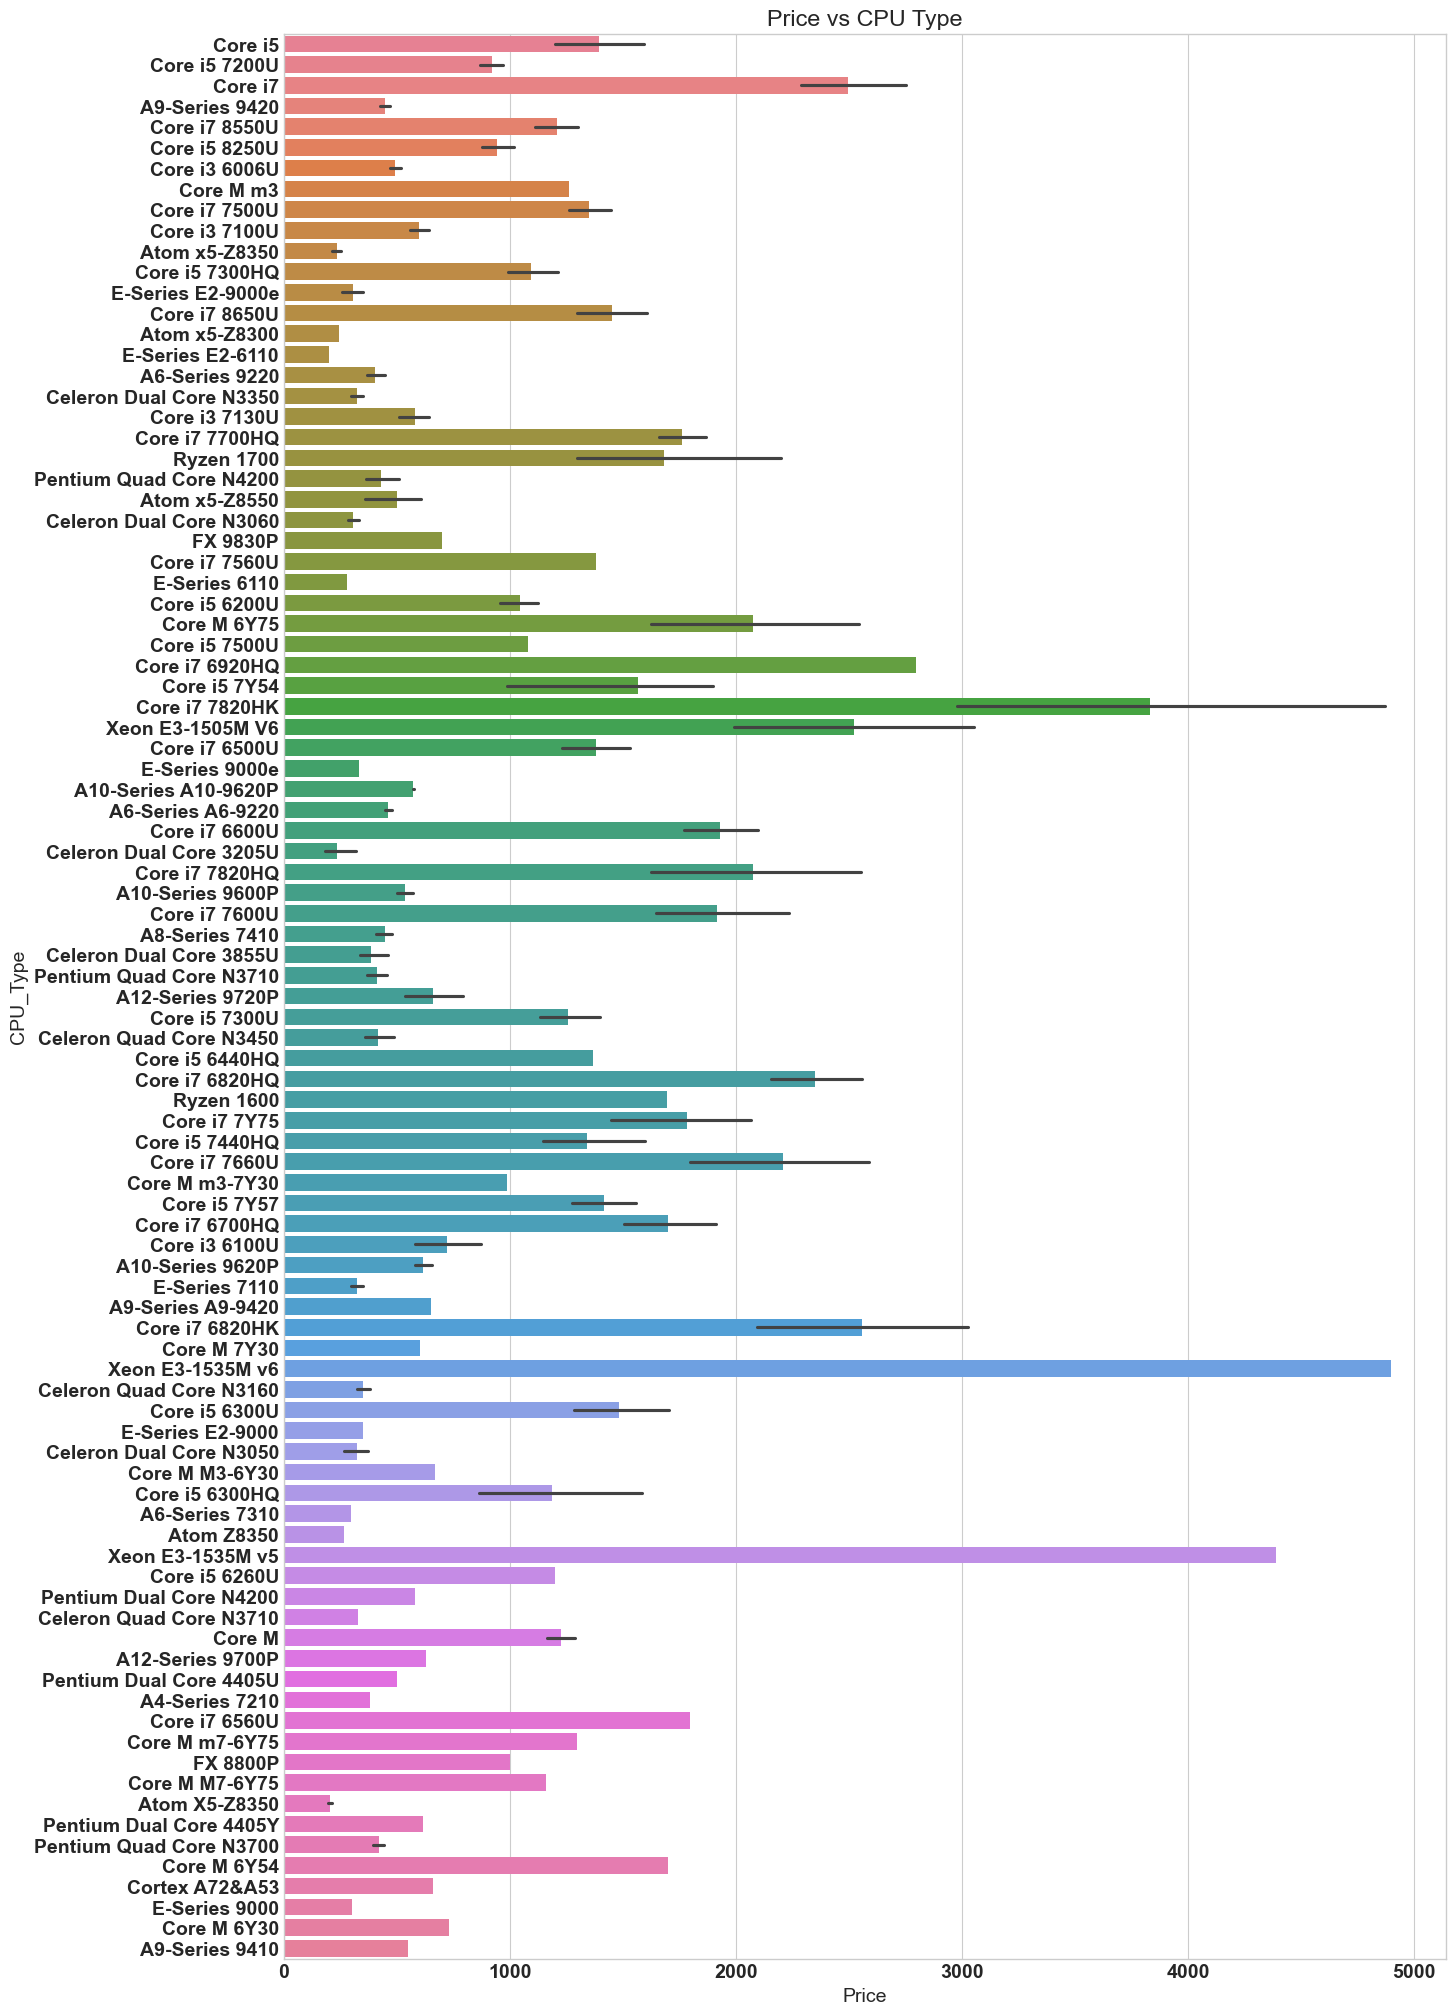

In [81]:
plt.figure(figsize=(15, 25))
sns.barplot(x="Price", y="CPU_Type", data=new_data, hue='CPU_Type')
plt.title('Price vs CPU Type')
plt.savefig('graphimages/cputype.png')

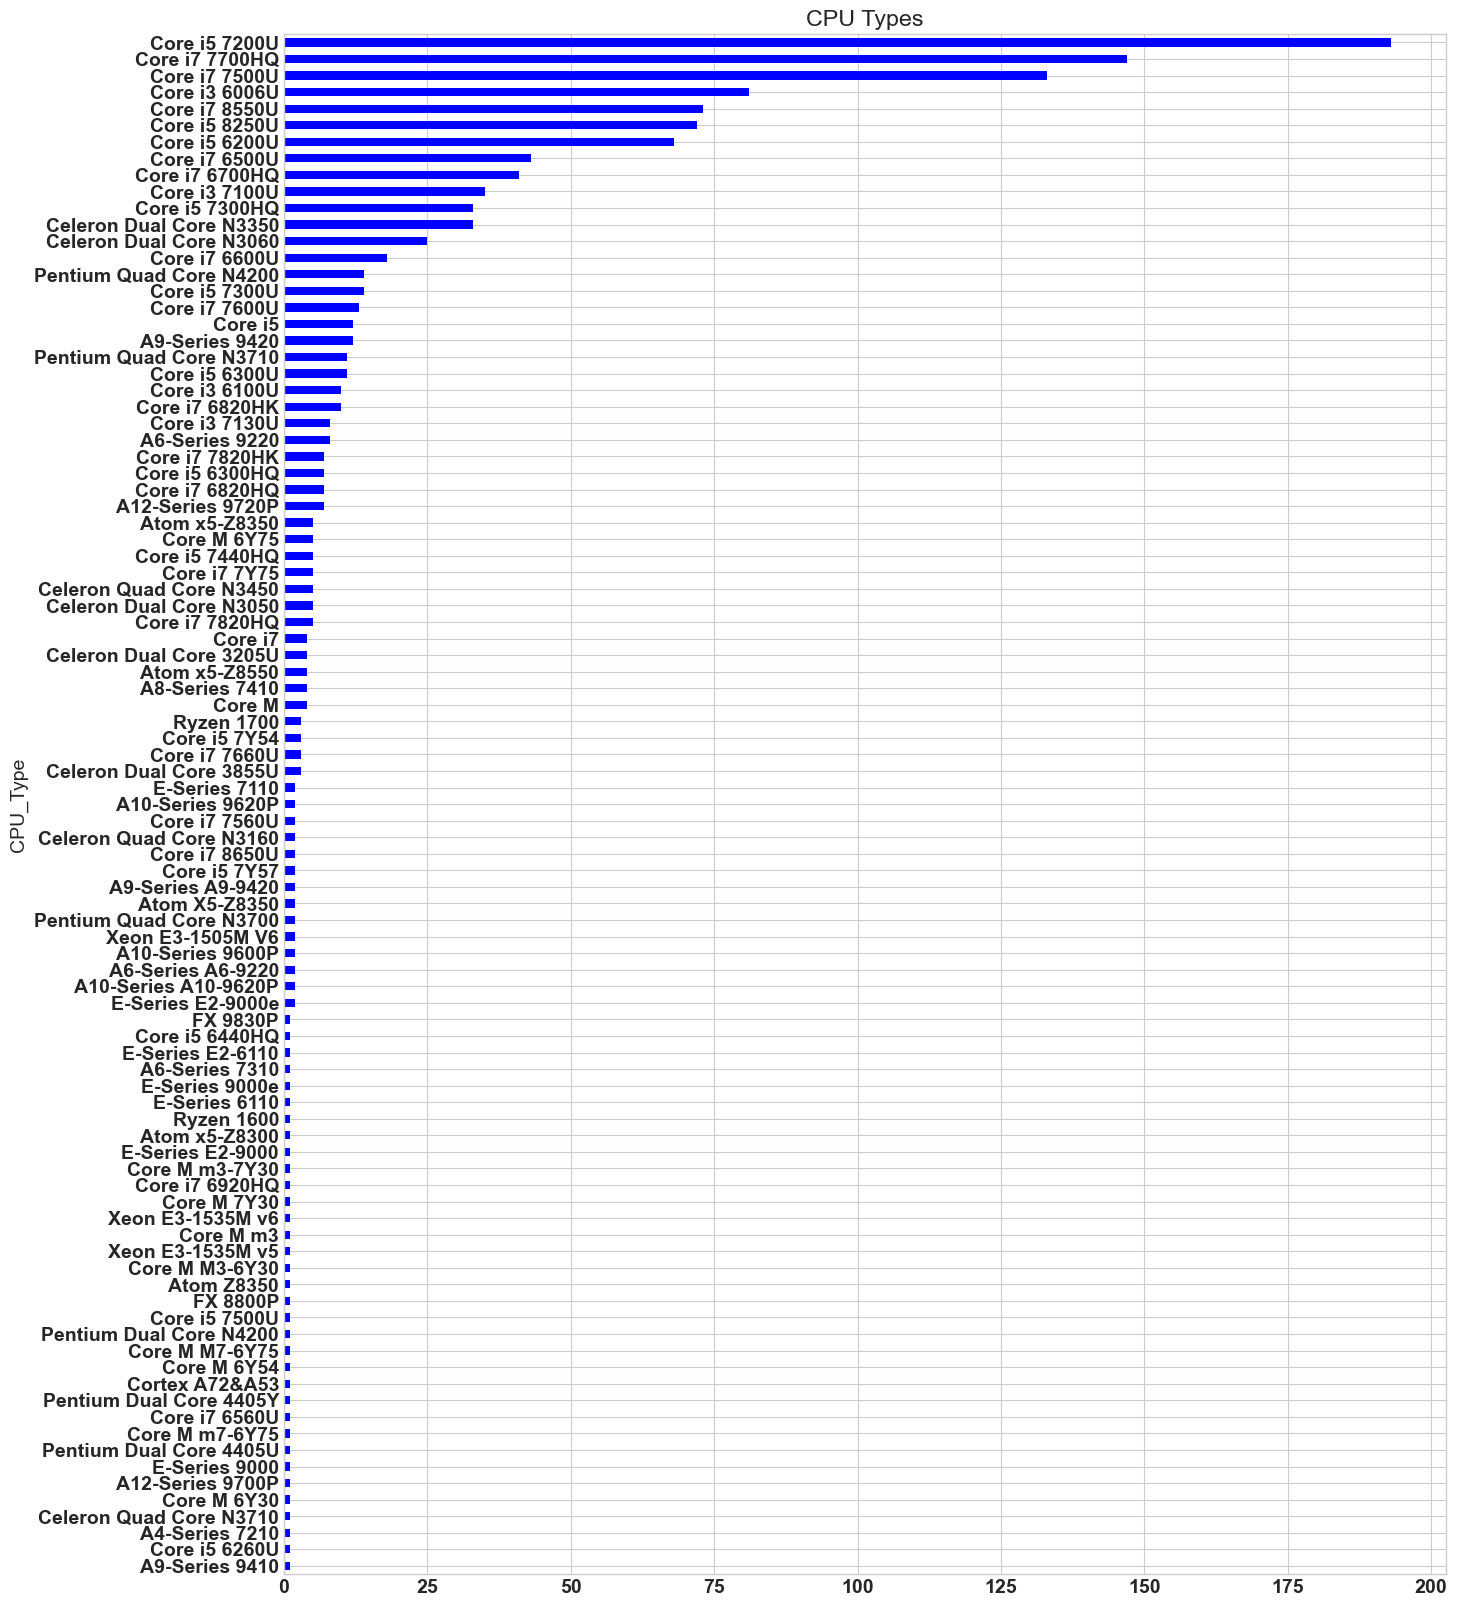

In [65]:
cputype = data['CPU_Type'].value_counts()
cputype = cputype.sort_values(ascending=True)
plt.figure(figsize=(15, 20))
cputype.plot(kind='barh', color='b', title='CPU Types')

plt.savefig('graphimages/cputypecount.png')

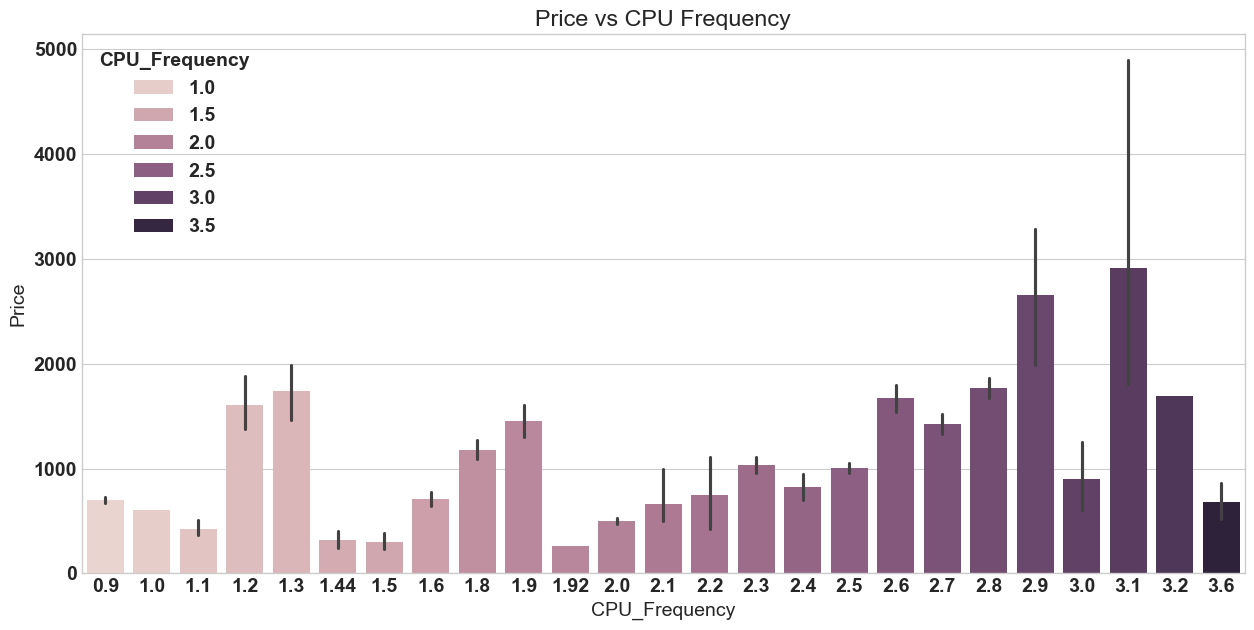

In [69]:
plt.figure(figsize=(15, 7))
sns.barplot(x="CPU_Frequency", y="Price", data=new_data, hue='CPU_Frequency')
plt.title('Price vs CPU Frequency')
plt.savefig('graphimages/frequency.png')

In [74]:
plt.figure(figsize=(15, 7))
sns.barplot(x="RAM", y="Price", data=new_data)
plt.title('Price vs RAM')
plt.savefig('graphimages/ram.png')

ValueError: Could not interpret value `RAM` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x700 with 0 Axes>

In [73]:
data['RAM'].value_counts()

KeyError: 'RAM'

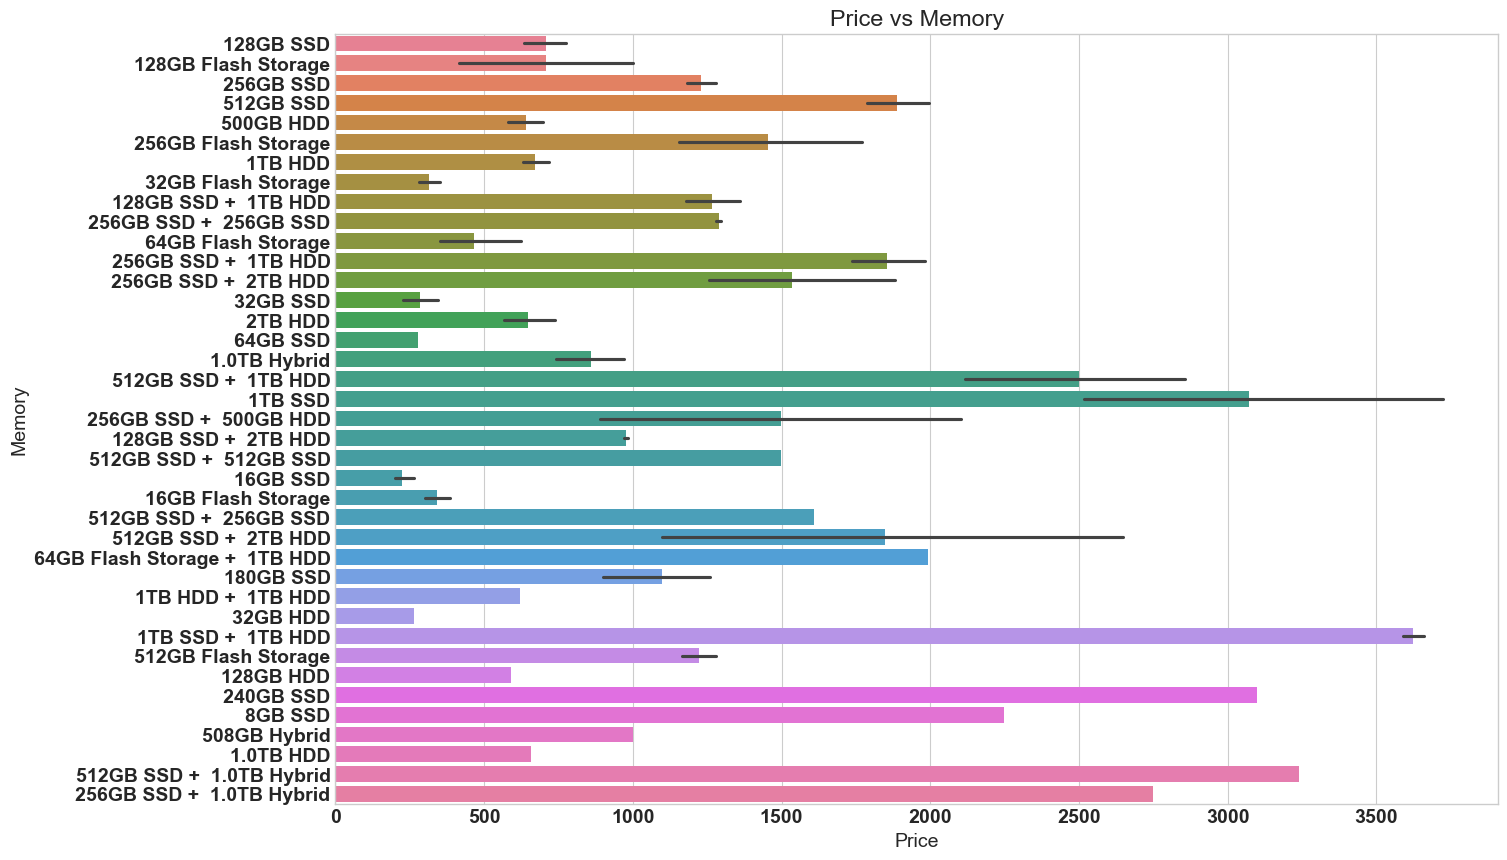

In [80]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Price", y="Memory", data=new_data, hue='Memory')
plt.title('Price vs Memory')
plt.savefig('graphimages/memory.png')

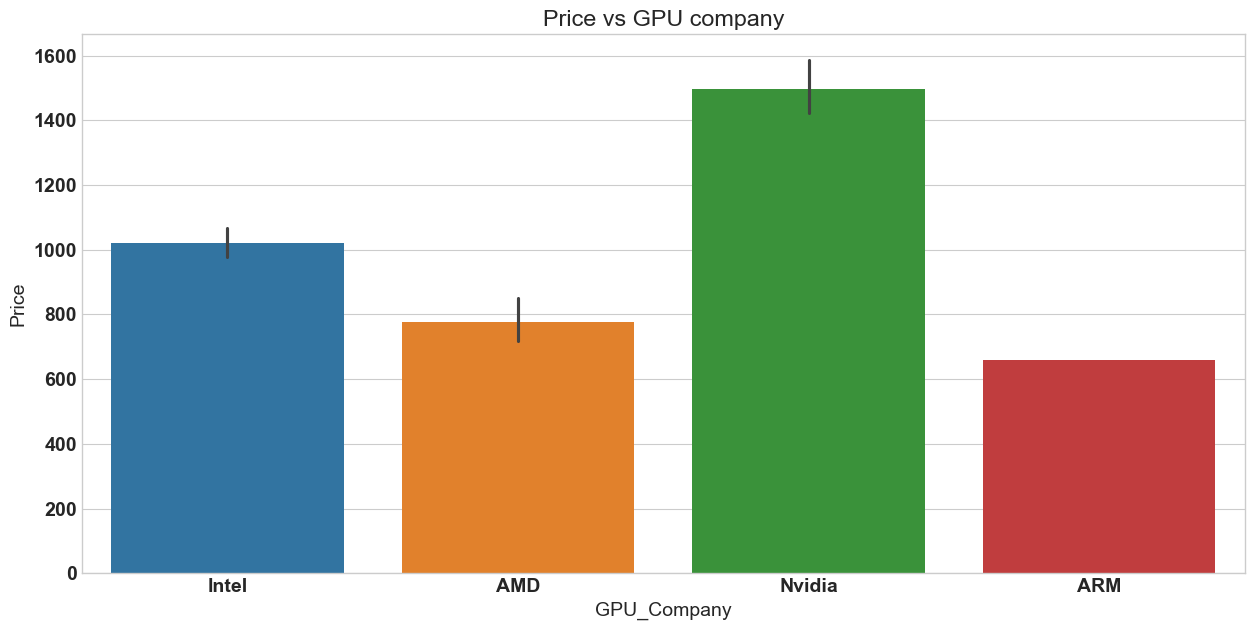

In [79]:
plt.figure(figsize=(15, 7))
sns.barplot(x="GPU_Company", y="Price", data=new_data, hue='GPU_Company')
plt.title('Price vs GPU company')
plt.savefig('graphimages/gpu.png')

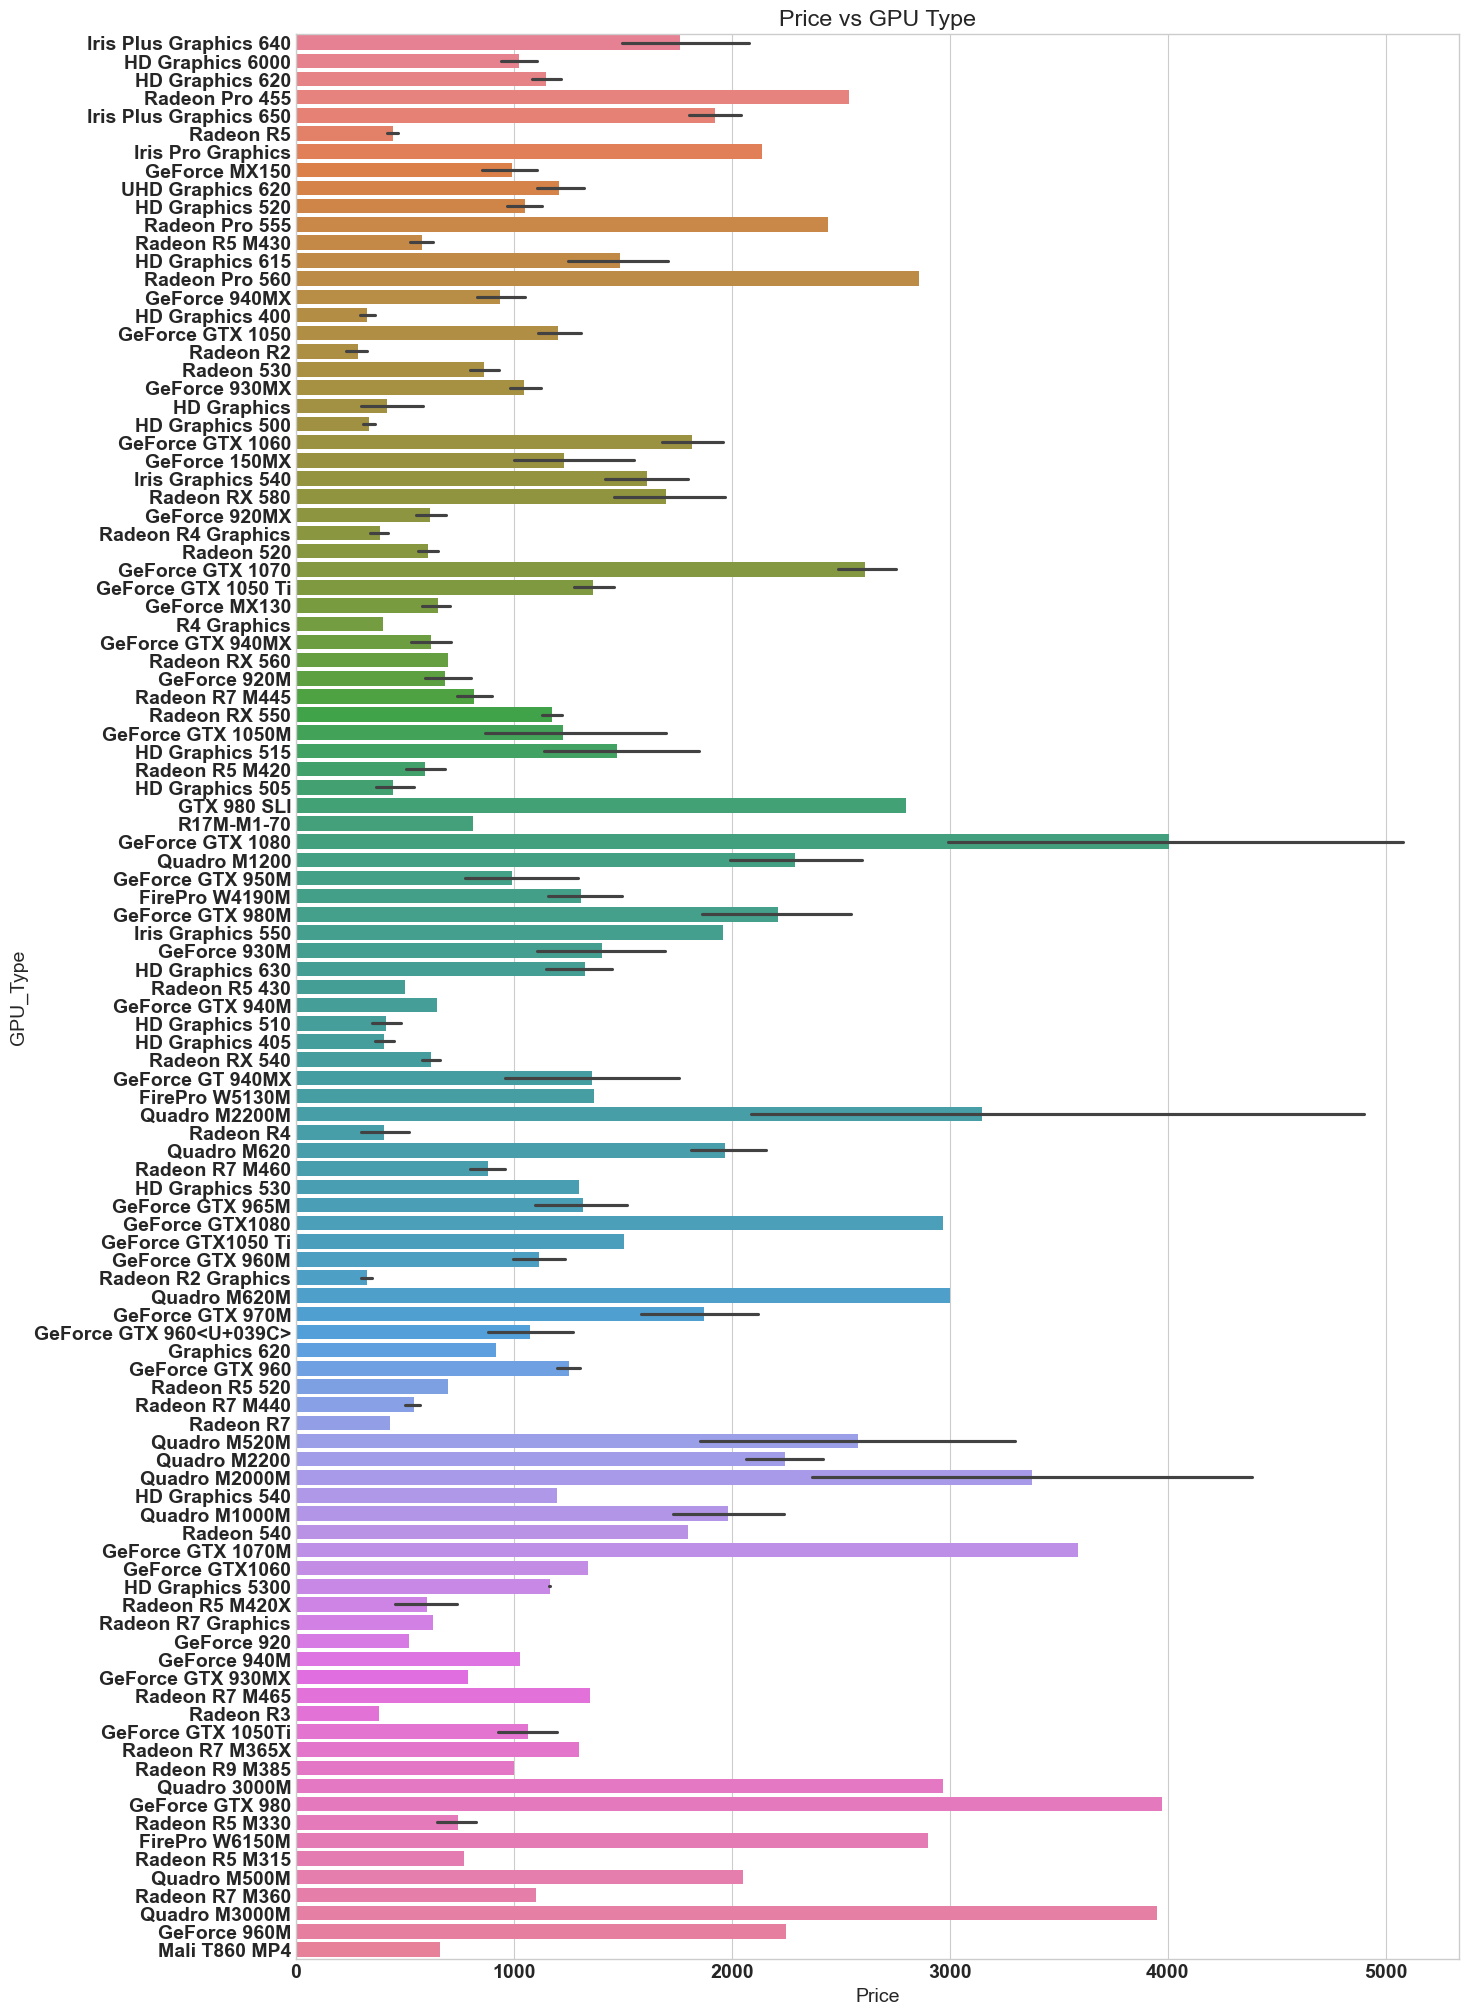

In [86]:
plt.figure(figsize=(15, 25))
sns.barplot(x="Price", y="GPU_Type", data=new_data, hue='GPU_Type')
plt.title('Price vs GPU Type')
plt.savefig('graphimages/cpu_type.png')

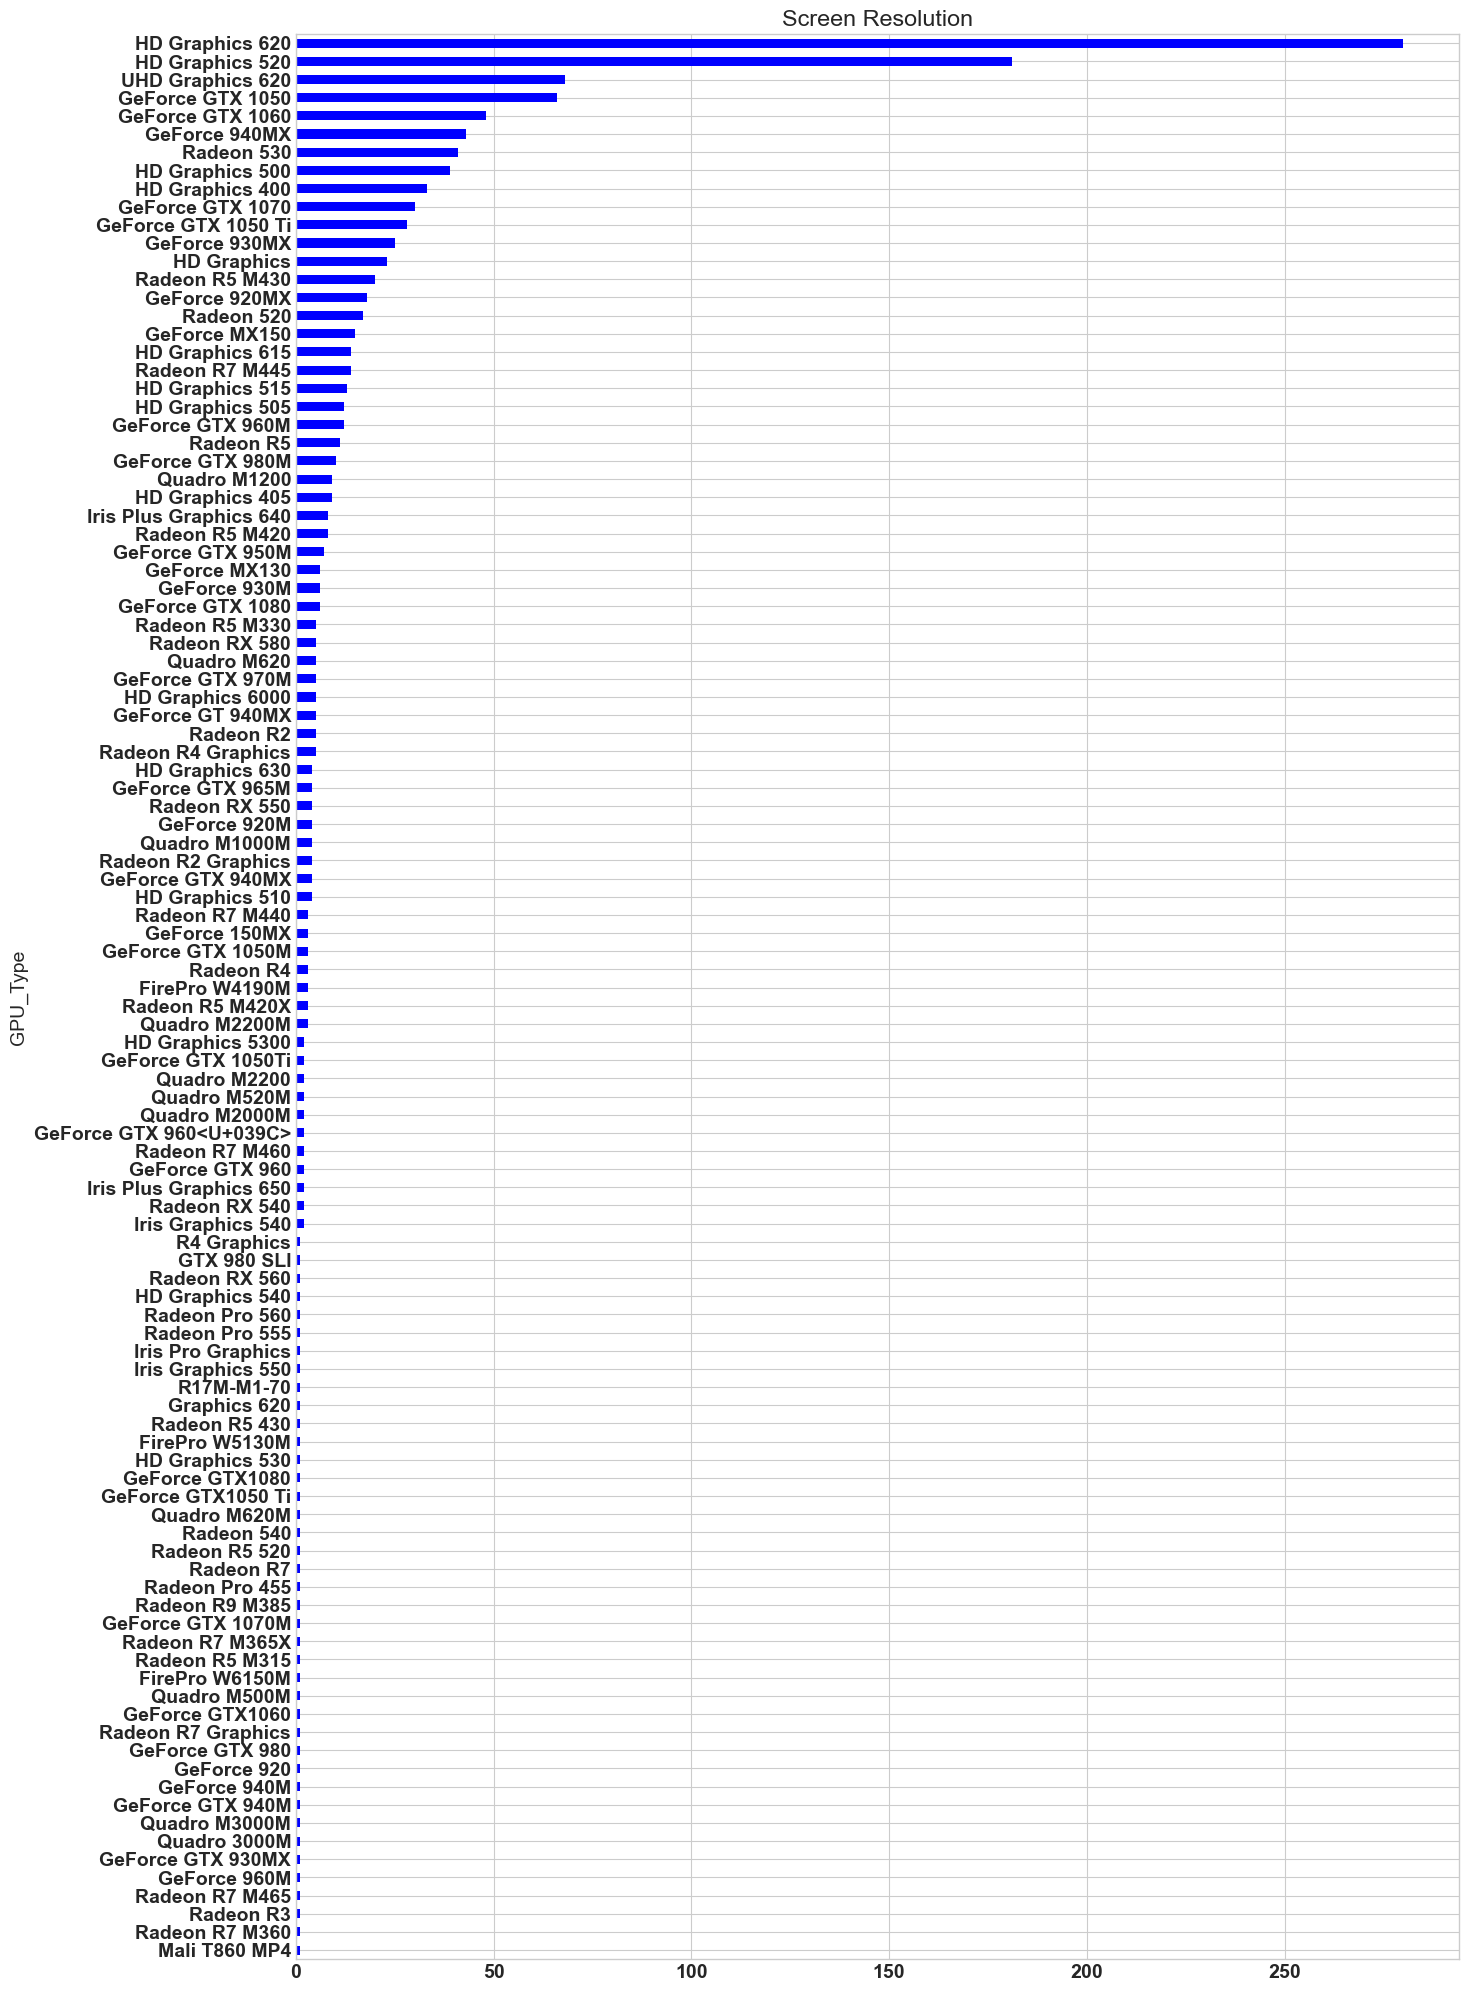

In [91]:
gpu = data['GPU_Type'].value_counts()
gpu = gpu.sort_values(ascending=True)
plt.figure(figsize=(15, 25))
gpu.plot(kind='barh', color='b', title='Screen Resolution')

plt.savefig('graphimages/gpucount.png')

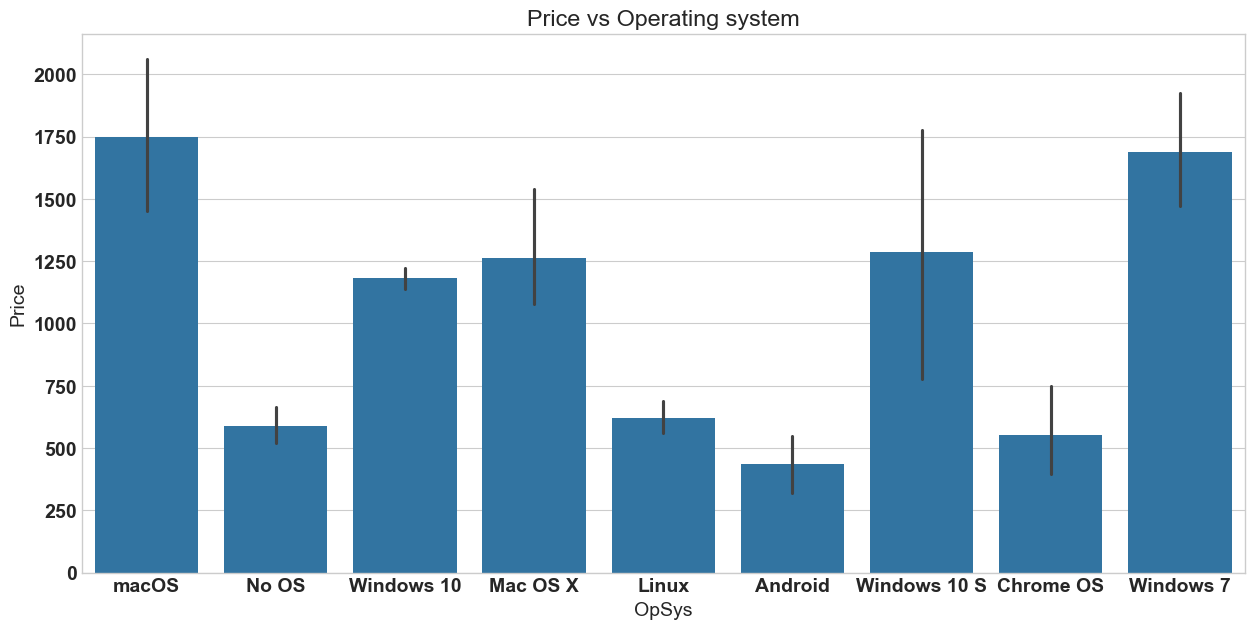

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x="OpSys", y="Price", data=new_data)
plt.title('Price vs Operating system')
plt.savefig('graphimages/opsys.png')

In [ ]:
weight = data['Weight (kg)'].unique()
weight = weight.sort_values(ascending=True)
plt.figure(figsize=(15, 25))
weight.plot(kind='barh', color='b', title='Weight Count')
plt.savefig('graphimages/weight.png')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<Figure size 1500x2500 with 0 Axes>